In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import sparse
import mglearn
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import font_manager, rc
plt.rcParams['image.cmap'] = "gray"
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [62]:
weather = pd.read_csv("C:/Users/SS/Desktop/weather.csv", encoding='euc=kr')
weather

,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),...,최대풍속 풍향(16방위),최다풍향(16방위),평균운량(1/10),평균중하층운량(1/10),합계 일조시간(hr),일조율(%),합계 일사량(MJ/m2),최심적설(cm),최심신적설(cm),3시간신적설합(cm)
0,속초,1968-01-01,-0.7,3.2,-4.4,11.4,-11.4,1018.2,1018.2,1028.8,...,270.0,270.0,2.1,NaN,218.6,72.00,NaN,NaN,NaN,NaN
1,속초,1968-02-01,-2.1,1.9,-5.4,9.7,-9.9,1022.8,1022.8,1030.6,...,250.0,270.0,2.7,NaN,236.5,76.05,NaN,1.8,1.8,4.3
2,속초,1968-03-01,5.9,9.8,2.1,20.5,-3.2,1016.1,1016.1,1027.0,...,320.0,270.0,3.7,NaN,223.7,60.69,NaN,0.0,0.0,0.0
3,속초,1968-04-01,10.5,14.4,6.7,21.4,4.0,1019.4,1019.4,1029.2,...,340.0,90.0,5.1,NaN,255.7,64.88,NaN,NaN,NaN,NaN
4,속초,1968-05-01,14.6,17.7,11.9,24.5,9.3,1011.7,1011.7,1021.2,...,250.0,90.0,6.7,NaN,187.8,42.70,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47233,남해,2021-03-21,10.6,15.8,6.0,22.0,0.8,1013.8,1019.3,1032.7,...,110.0,250.0,5.1,3.0,207.4,55.80,NaN,NaN,NaN,NaN
47234,남해,2021-04-21,14.3,20.0,9.3,25.0,4.5,1012.8,1018.2,1033.0,...,290.0,250.0,5.3,3.0,242.8,61.89,NaN,NaN,NaN,NaN
47235,남해,2021-05-21,18.3,23.1,13.7,28.3,7.7,1004.2,1009.5,1020.8,...,140.0,270.0,5.8,3.5,217.0,50.01,NaN,NaN,NaN,NaN
47236,남해,2021-06-21,22.1,26.6,18.4,29.7,14.5,1002.9,1008.1,1017.0,...,110.0,250.0,6.3,3.1,209.9,48.36,NaN,NaN,NaN,NaN


In [63]:
rice = pd.read_csv("C:/Users/SS/Desktop/city.csv", encoding="euc=kr")
rice = rice.drop(columns = '단위')
rice

,행정구역별,항목,1965 년,1966 년,1967 년,1968 년,1969 년,1970 년,1971 년,1972 년,...,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년
0,전국,재배면적,1208925.4,1209344.3,1214337.7,1136378.4,1208045.7,1193400.4,1187805.2,1187620.4,...,8.507980e+05,8.468700e+05,8.313550e+05,8.143340e+05,7.979570e+05,7.778721e+05,7.543389e+05,7.374080e+05,7.295847e+05,7.261797e+05
1,전국,10a당 생산량,287.0,320.0,294.0,279.0,336.0,327.0,335.0,331.0,...,4.956061e+02,4.725818e+02,5.084902e+02,5.203685e+02,5.417683e+02,5.392427e+02,5.265019e+02,5.244606e+02,5.131505e+02,4.827983e+02
2,전국,생산량,3464351.5,3870504.3,3571873.1,3165980.1,4057104.5,3906780.8,3975334.9,3933443.3,...,4.216607e+06,4.002154e+06,4.227359e+06,4.237538e+06,4.323078e+06,4.194618e+06,3.971609e+06,3.867415e+06,3.743868e+06,3.505984e+06
3,서울특별시,재배면적,8098.1,8121.0,7238.8,6553.5,6146.8,4979.9,4067.2,3974.3,...,2.680000e+02,2.670000e+02,2.490000e+02,3.060000e+02,3.070000e+02,1.230000e+02,1.309971e+02,1.267555e+02,1.233821e+02,1.214212e+02
4,서울특별시,10a당 생산량,259.0,235.0,297.0,288.0,308.0,301.0,309.0,160.0,...,4.420686e+02,4.635654e+02,4.579624e+02,4.931985e+02,5.125964e+02,5.125947e+02,4.841645e+02,4.998932e+02,4.876456e+02,4.635064e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,북제주군,10a당 생산량,285.0,176.0,159.0,183.0,260.0,223.0,254.0,288.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791,북제주군,생산량,813.4,579.9,478.9,549.7,882.7,707.9,746.3,890.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
792,남제주군,재배면적,577.9,584.2,583.3,574.6,580.2,543.2,520.0,613.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,남제주군,10a당 생산량,354.0,233.0,275.0,256.0,310.0,209.0,262.0,353.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
rice.columns

Index(['행정구역별', '항목', '1965 년', '1966 년', '1967 년', '1968 년', '1969 년',
       '1970 년', '1971 년', '1972 년', '1973 년', '1974 년', '1975 년', '1976 년',
       '1977 년', '1978 년', '1979 년', '1980 년', '1981 년', '1982 년', '1983 년',
       '1984 년', '1985 년', '1986 년', '1987 년', '1988 년', '1989 년', '1990 년',
       '1991 년', '1992 년', '1993 년', '1994 년', '1995 년', '1996 년', '1997 년',
       '1998 년', '1999 년', '2000 년', '2001 년', '2002 년', '2003 년', '2004 년',
       '2005 년', '2006 년', '2007 년', '2008 년', '2009 년', '2010 년', '2011 년',
       '2012 년', '2013 년', '2014 년', '2015 년', '2016 년', '2017 년', '2018 년',
       '2019 년', '2020 년'],
      dtype='object')

In [65]:
rice_1 = rice[rice['항목']=='10a당 생산량']
rice_1 = rice_1.reset_index().drop(columns = 'index')
rice_1 = pd.DataFrame(rice_1.set_index(['행정구역별','항목']).stack(dropna = False))
rice_2 = rice_1.reset_index().drop(columns = '항목')
rice_2 = rice_2.rename(columns = {'행정구역별':'지점명','level_2':'일시',0:'10a당 생산량'})
rice_2 = rice_2[rice_2['지점명'] !='전국']
rice_3 = rice_2.reset_index().drop(columns = 'index')
rice_3
#rice_3.to_csv("rice_3.csv", header= False, encoding = 'euc=kr')

,지점명,일시,10a당 생산량
0,서울특별시,1965 년,259.0
1,서울특별시,1966 년,235.0
2,서울특별시,1967 년,297.0
3,서울특별시,1968 년,288.0
4,서울특별시,1969 년,308.0
...,...,...,...
14779,남제주군,2016 년,NaN
14780,남제주군,2017 년,NaN
14781,남제주군,2018 년,NaN
14782,남제주군,2019 년,NaN


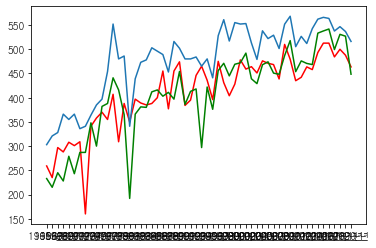

In [66]:
a = rice_3[rice_3['지점명']=='서울특별시']
b = rice_3[rice_3['지점명']=='충청남도']
c = rice_3[rice_3['지점명']=='강원도']
plt.plot(a['일시'],a['10a당 생산량'],'r')
plt.plot(b['일시'],b['10a당 생산량'])
plt.plot(c['일시'],c['10a당 생산량'],'g')
plt.show()

In [67]:
#a.set_index('일시')

#y = a['10a당 생산량']
#a['일시'] = pd.to_datetime(a['일시'])
#a

In [12]:
'''from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(a['10a당 생산량'], model = 'additive', freq = 1)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)'''

"from statsmodels.tsa.seasonal import seasonal_decompose\nresult = seasonal_decompose(a['10a당 생산량'], model = 'additive', freq = 1)\nfig = plt.figure()\nfig = result.plot()\nfig.set_size_inches(20,15)"

In [137]:
#공통지역 찾기
w= np.array(weather['지점명'].unique())
r = np.array(rice_3['지점명'].unique())
c = []
e= []
w
r
for i in r:
    for j in w:
        if j in i:
            c.append(j)
            e.append(i)        
c = pd.Series(c).unique()
e = pd.Series(e).unique()

array(['서울특별시', '부산광역시', '부산진구', '대구광역시', '인천광역시', '강화군', '광주광역시',
       '대전광역시', '울산광역시', '세종특별자치시', '인천시', '수원시', '동두천시', '파주시', '이천시',
       '광주시', '양평군', '파주군', '광주군', '이천군', '춘천시', '원주시', '강릉시', '동해시',
       '태백시', '속초시', '삼척시', '홍천군', '영월군', '정선군', '철원군', '인제군', '삼척군',
       '청주시', '충주시', '제천시', '보은군', '제천군', '천안시', '보령시', '서산시', '금산군',
       '부여군', '홍성군', '대전시', '보령군', '서산군', '전주시', '군산시', '정읍시', '남원시',
       '장수군', '임실군', '순창군', '고창군', '부안군', '남원군', '정읍군', '목포시', '여수시',
       '순천시', '광양시', '고흥군', '보성군', '장흥군', '강진군', '해남군', '무안군', '영광군',
       '완도군', '진도군', '포항시', '경주시', '안동시', '구미시', '영주시', '영천시', '상주시',
       '문경시', '의성군', '청송군', '영덕군', '봉화군', '울진군', '대구시', '안동군', '영천군',
       '상주군', '문경군', '영주군', '창원시', '진주시', '통영시', '김해시', '밀양시', '거제시',
       '양산시', '의령군', '남해군', '산청군', '함양군', '거창군', '합천군', '울산시', '밀양군',
       '창원군', '통영군', '거제군', '제주도', '제주시', '서귀포시', '북제주군', '남제주군'],
      dtype=object)

In [147]:
#전라남도 지역
d = ['순천','영광군','목포','고흥','여수','무안','진도군','완도','해남','장흥','강진군'] 

['순천', '영광군', '목포', '고흥', '여수', '무안', '진도군', '완도', '해남', '장흥', '강진군']

In [177]:
weather_5 = weather[(weather['지점명']=='순천')| (weather['지점명']=='영광군')|(weather['지점명']=='목포')|(weather['지점명']=='고흥')|(weather['지점명']=='여수')|(weather['지점명']=='무안')|(weather['지점명']=='진도군')|(weather['지점명']=='완도')|(weather['지점명']=='해남')|(weather['지점명']=='장흥')|(weather['지점명']=='강진군')]
#weather_5.to_csv("기상전처리1.csv", encoding = 'euc=kr')
weather_5 = weather_5.reset_index().drop(columns = 'index')
weather_5

,지점명,일시,평균기온(°C),평균최고기온(°C),평균최저기온(°C),최고기온(°C),최저기온(°C),평균현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),...,최대풍속 풍향(16방위),최다풍향(16방위),평균운량(1/10),평균중하층운량(1/10),합계 일조시간(hr),일조율(%),합계 일사량(MJ/m2),최심적설(cm),최심신적설(cm),3시간신적설합(cm)
0,무안,1993-01-01,0.9,3.6,-2.0,10.1,-7.9,1022.9,1025.8,1034.7,...,340.0,340.0,7.2,4.0,102.6,32.77,NaN,11.2,9.9,32.5
1,무안,1993-02-01,2.5,6.5,-1.0,15.9,-4.8,1019.6,1022.5,1034.1,...,320.0,340.0,5.3,3.5,160.6,52.54,NaN,1.8,1.8,3.0
2,무안,1993-03-01,5.6,10.1,1.5,15.4,-3.4,1018.2,1021.0,1030.2,...,340.0,340.0,4.0,2.4,216.2,60.22,NaN,0.3,0.3,0.3
3,무안,1993-04-01,10.3,15.5,5.8,22.9,-0.6,1014.1,1016.9,1031.2,...,340.0,290.0,5.1,2.5,222.6,56.76,NaN,NaN,NaN,NaN
4,무안,1993-05-01,16.3,20.9,12.3,26.4,8.1,1010.1,1012.8,1021.3,...,90.0,340.0,5.4,2.6,220.9,52.56,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4363,진도군,2021-03-21,9.6,14.7,4.8,21.8,-1.1,1018.4,1019.6,1030.8,...,320.0,320.0,5.5,3.7,207.0,55.71,NaN,NaN,NaN,NaN
4364,진도군,2021-04-21,13.7,18.7,8.4,24.5,2.0,1017.1,1018.3,1031.6,...,180.0,320.0,5.2,3.4,226.7,57.83,NaN,NaN,NaN,NaN
4365,진도군,2021-05-21,17.4,22.4,11.9,27.7,4.9,1008.5,1009.7,1020.9,...,320.0,320.0,5.5,3.3,216.7,50.02,NaN,NaN,NaN,NaN
4366,진도군,2021-06-21,NaN,NaN,NaN,30.3,12.9,1006.3,1007.7,1015.5,...,20.0,110.0,6.3,3.0,220.8,50.99,NaN,NaN,NaN,NaN


In [3]:
rice_a = pd.read_csv("C:/Users/SS/Downloads/시군데이터.csv", encoding='euc=kr')
rice_a

,연도,지역명,10a당 생산량,생산량
0,1965,순천,262.00000,5260.20000
1,1966,순천,340.00000,6706.00000
2,1967,순천,305.00000,6067.40000
3,1968,순천,253.00000,4624.30000
4,1969,순천,355.00000,6981.00000
...,...,...,...,...
611,2016,강진군,505.13434,49558.72996
612,2017,강진군,505.26790,49068.06371
613,2018,강진군,494.88403,43112.83577
614,2019,강진군,467.85884,41693.17690


In [11]:
weather_6 = pd.read_csv("C:/Users/SS/Downloads/기상데이터 전처리2.csv", encoding='euc=kr')
weather_6 = weather_6.drop(columns='Unnamed: 0.1')
weather_6 = weather_6.drop(columns='Unnamed: 0')
weather_6 = weather_6.rename(columns={'지점명':'지역명'})
weather_6
a = pd.merge(weather_6,rice_a,on=['연도','지역명'],how='left').drop(columns = '일시')
a.to_csv("통합(전라).csv", encoding = 'euc=kr')